# Estimate moments from Taylor expansions

In this basic example we are going to estimate mean and standard deviation of a composite random vector.

In [24]:
from __future__ import print_function
import openturns as ot

In [25]:
# Create a composite random vector
ot.RandomGenerator.SetSeed(0)
input_names = ['x1', 'x2', 'x3', 'x4']
myFunc = ot.SymbolicFunction(input_names,
    ['cos(x2*x2+x4)/(x1*x1+1+x3^4)'])
R = ot.CorrelationMatrix(4)
for i in range(4):
    R[i, i - 1] = 0.25
distribution = ot.Normal([0.2]*4, [0.1, 0.2, 0.3, 0.4], R)
distribution.setDescription(input_names)
# We create a distribution-based RandomVector
X = ot.RandomVector(distribution)
# We create a composite RandomVector Y from X and myFunc
Y = ot.RandomVector(myFunc, X)

In [26]:
# We create a Taylor expansion method to approximate moments
myTaylorExpansionMoments = ot.TaylorExpansionMoments(Y)

In [27]:
# get mean
print(myTaylorExpansionMoments.getMeanFirstOrder())

[0.932544]


In [28]:
# get covariance
print(myTaylorExpansionMoments.getCovariance())

[[ 0.0124546 ]]


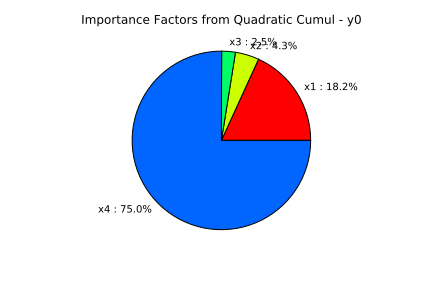

In [29]:
myTaylorExpansionMoments.drawImportanceFactors()